In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/laptop_details.csv")

In [ ]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [ ]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

Cleaning the MRP column and changing the datatype 

In [ ]:
df['MRP'] = df["MRP"].str.replace("₹","")

In [ ]:
df["MRP"]

0        36,990
1        39,990
2        32,990
3        49,990
4        49,990
         ...   
715      23,490
716      73,490
717    1,94,990
718    1,25,990
719      50,990
Name: MRP, Length: 720, dtype: object

In [ ]:
df['MRP'] = df["MRP"].str.replace(",","")

In [ ]:


df['MRP']

0       36990
1       39990
2       32990
3       49990
4       49990
        ...  
715     23490
716     73490
717    194990
718    125990
719     50990
Name: MRP, Length: 720, dtype: object

In [ ]:
df['MRP'] = df['MRP'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    float64
 3   Feature  720 non-null    object 
dtypes: float64(2), object(2)
memory usage: 22.6+ KB


In [ ]:
df['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [ ]:
import re

Extracting the laptop features from Features column 

Processor

In [ ]:
df['Processor']=df.Feature.apply(lambda x: re.compile(r'.*\s+Processor').search(x).group())

In [ ]:
df[df['Processor'].isnull()]

,Product,Rating,MRP,Feature,Processor


In [ ]:
for i in range(len(df['Processor'])):
  if df['Processor'][i] == '':
    print(i)

In [ ]:
for i in range(len(df['Processor'])):
  if df['Processor'][i] == '':
    df['Processor'][i] = re.compile(r'(Intel Core|Intel|AMD Ryzen|ADM)\s+\w+').search(df['Feature'][i]).group()
    print(i)

In [ ]:
df['Processor'] = df["Processor"].str.replace("Processor","")

In [ ]:
df["Processor"].unique()

array(['Intel Core i3 ', 'AMD Ryzen 5 Hexa Core ', 'Intel Core i5 ',
       ': Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 ',
       'Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 ',
       'AMD Ryzen 7 Quad Core ', 'AMD Ryzen 5 Quad Core ',
       'AMD Ryzen 9 Octa Core ', 'AMD Ryzen 7 Octa Core ', 'Apple M1 ',
       'Intel Celeron Dual Core ', 'AMD Ryzen 3 Dual Core ',
       'Free upgrade to Windows 11 when availableAMD Ryzen 5 Hexa Core ',
       'AMD Athlon Dual Core ',
       'Powered by 11th Gen

In [ ]:
df['Feature'][94]

'Processor: Intel PQC-N5030 (1.10 GHz up to 3.10 GHz)RAM & Storage: 8GB DDR4 & 256GB SSDDisplay: 15.6" HD AG Narrow BorderSoftware: Win 11 + Office H&S 20212x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneWiFi & BT: 802.11ac 1x1 WiFi and BluetoothIntel Pentium Silver Processor8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD39.62 cm (15.6 Inch) Display1 Year Onsite Warranty'

In [ ]:
df['Processor'].unique()

array(['Intel Core i3 ', 'AMD Ryzen 5 Hexa Core ', 'Intel Core i5 ',
       ': Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 ',
       'Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 ',
       'AMD Ryzen 7 Quad Core ', 'AMD Ryzen 5 Quad Core ',
       'AMD Ryzen 9 Octa Core ', 'AMD Ryzen 7 Octa Core ', 'Apple M1 ',
       'Intel Celeron Dual Core ', 'AMD Ryzen 3 Dual Core ',
       'Free upgrade to Windows 11 when availableAMD Ryzen 5 Hexa Core ',
       'AMD Athlon Dual Core ',
       'Powered by 11th Gen

In [ ]:
df['Processor']=df.Feature.apply(lambda x: re.compile(r'(Intel|AMD|Apple|Qualcomm)\s+\w+\s+\w+\s+\w+\s+').search(x).group())

In [ ]:
df['Processor'].unique()

array(['Intel Core i3 Processor ', 'AMD Ryzen 5 Hexa ',
       'Intel Core i5 Processor ', 'Intel OptaneIntel Core i3 ',
       'AMD Ryzen 7 Quad ', 'AMD Ryzen 5 Quad ', 'AMD Ryzen 9 Octa ',
       'AMD Ryzen 7 Octa ', 'Apple M1 Processor8 GB ',
       'Intel Celeron Dual Core ', 'AMD Ryzen 3 Dual ',
       'AMD Athlon Dual Core ', 'Intel Evo Core i5 ', 'AMD Ryzen 3 Quad ',
       'Apple M2 Processor8 GB ', 'Intel Celeron Quad Core ',
       'Intel Core i7 Processor ', 'Apple M1 Pro Processor16 ',
       'Qualcomm Snapdragon 7c Gen ', 'Intel Pentium Silver Processor8 ',
       'Apple M1 Processor16 GB ', 'Apple M1 Max Processor32 ',
       'Intel Core i9 Processor ', 'AMD Ryzen 5 Dual ',
       'Intel UHD Graphics with ', 'Intel Pentium Quad Core ',
       'AMD Dual Core Processor4 ', 'AMD Ryzen 3 Hexa '], dtype=object)

In [ ]:
start = ['Intel','AMD','Apple','Qualcomm']
result = []
for i in df['Feature']:
  for j in start:
    if re.search(j,i):
      st = i.index(j)
      end = i.index('Processor') + len('Processor')
      result.append(i[st:end])
      break

In [ ]:
df['Processor'] = result

In [ ]:
df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', '', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'Intel Pentium Silver Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [ ]:
df

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor
...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor


In [ ]:
df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', '', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'Intel Pentium Silver Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [ ]:
for i in range(len(df['Processor'])):
  if df['Processor'][i] == "":
    df['Processor'][i] = re.compile(r'(Intel Pentium|Intel Core|AMD Ryzen|AMD)\s+\w+').search(df['Feature'][i]).group()
    print(df['Processor'][i])
    print(i)

Intel Core i3
6
AMD Ryzen R5
69
Intel Pentium Silver
94
AMD Ryzen 3
142
Intel Core i3
172
Intel Core i3
249
AMD Ryzen 5
253
Intel Core i5
349
Intel Core i3
355
Intel Core i7
593


<ipython-input-29-e8b4fd842e46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor'][i] = re.compile(r'(Intel Pentium|Intel Core|AMD Ryzen|AMD)\s+\w+').search(df['Feature'][i]).group()


In [ ]:
df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel Core i3',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'AMD Ryzen R5', 'Intel Celeron Quad Core Processor',
       'Intel Core i7 Processor', 'Apple M1 Pro Processor',
       'Qualcomm Snapdragon 7c Gen 2 Processor', 'Intel Pentium Silver',
       'AMD Ryzen 3', 'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'Intel Pentium Silver Processor', 'AMD Ryzen 5',
       'AMD Ryzen 5 Dual Core Processor', 'Intel Core i5',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'Intel 

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Processor","")

In [ ]:
df['Processor'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Quad Core',
       'AMD Ryzen 9 Octa Core', 'AMD Ryzen 7 Octa Core', 'Apple M1',
       'Intel Celeron Dual Core', 'AMD Ryzen 3 Dual Core',
       'AMD Athlon Dual Core', 'Intel Evo Core i5',
       'AMD Ryzen 3 Quad Core', 'Apple M2', 'AMD Ryzen R5',
       'Intel Celeron Quad Core', 'Intel Core i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium Silver',
       'AMD Ryzen 3', 'Apple M1 Max', 'Intel Core i9', 'AMD Ryzen 5',
       'AMD Ryzen 5 Dual Core', 'Intel Pentium Quad Core',
       'AMD Dual Core', 'AMD Ryzen 3 Hexa Core'], dtype=object)

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Core","")

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Quad","")

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Hexa","")

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Octa","")

In [ ]:
df['Processor'] = df['Processor'].str.replace(" Dual","")

In [ ]:
df['Processor'] = df['Processor'].str.replace(" 7c Gen 2","")

In [ ]:
df['Processor'] = df['Processor'].str.replace("Pentium","Pentium Silver")

In [ ]:
df['Processor'] = df['Processor'].str.replace("Pentium Silver Silver","Pentium Silver")

In [ ]:
df['Processor'] = df['Processor'].str.replace(' Evo','')

In [ ]:
df['Processor'] = df['Processor'].str.replace('R5','5')

In [ ]:
df['Processor'].unique()

array(['Intel i3', 'AMD Ryzen 5', 'Intel i5', 'AMD Ryzen 7',
       'AMD Ryzen 9', 'Apple M1', 'Intel Celeron', 'AMD Ryzen 3',
       'AMD Athlon', 'Apple M2', 'Intel i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon', 'Intel Pentium Silver', 'Apple M1 Max',
       'Intel i9', 'AMD'], dtype=object)

In [ ]:
df[df['Processor'] == 'Intel Celeron']

,Product,Rating,MRP,Feature,Processor
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,19490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
62,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,4.0,23990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
72,Infinix INBook X1 Neo Series Celeron Quad Core...,4.2,22990.0,Intel Celeron Quad Core Processor8 GB LPDDR4X ...,Intel Celeron
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,15990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
183,Infinix INBook X1 Neo Series Celeron Quad Core...,4.2,20990.0,Intel Celeron Quad Core Processor4 GB LPDDR4X ...,Intel Celeron
202,Lenovo IdeaPad 3 Celeron Dual Core 4th Gen - (...,4.0,25950.0,Intel Celeron Dual Core Processor (4th Gen)4 G...,Intel Celeron
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
434,Lenovo IdeaPad 1 Celeron Dual Core 4th Gen - (...,3.9,26490.0,Intel Celeron Dual Core Processor (4th Gen)4 G...,Intel Celeron


In [ ]:
df['Feature'][575]

'AMD Dual Core Processor4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) Display1 Year Onsite Warranty'

<Axes: title={'center': 'MRP'}, xlabel='Processor'>

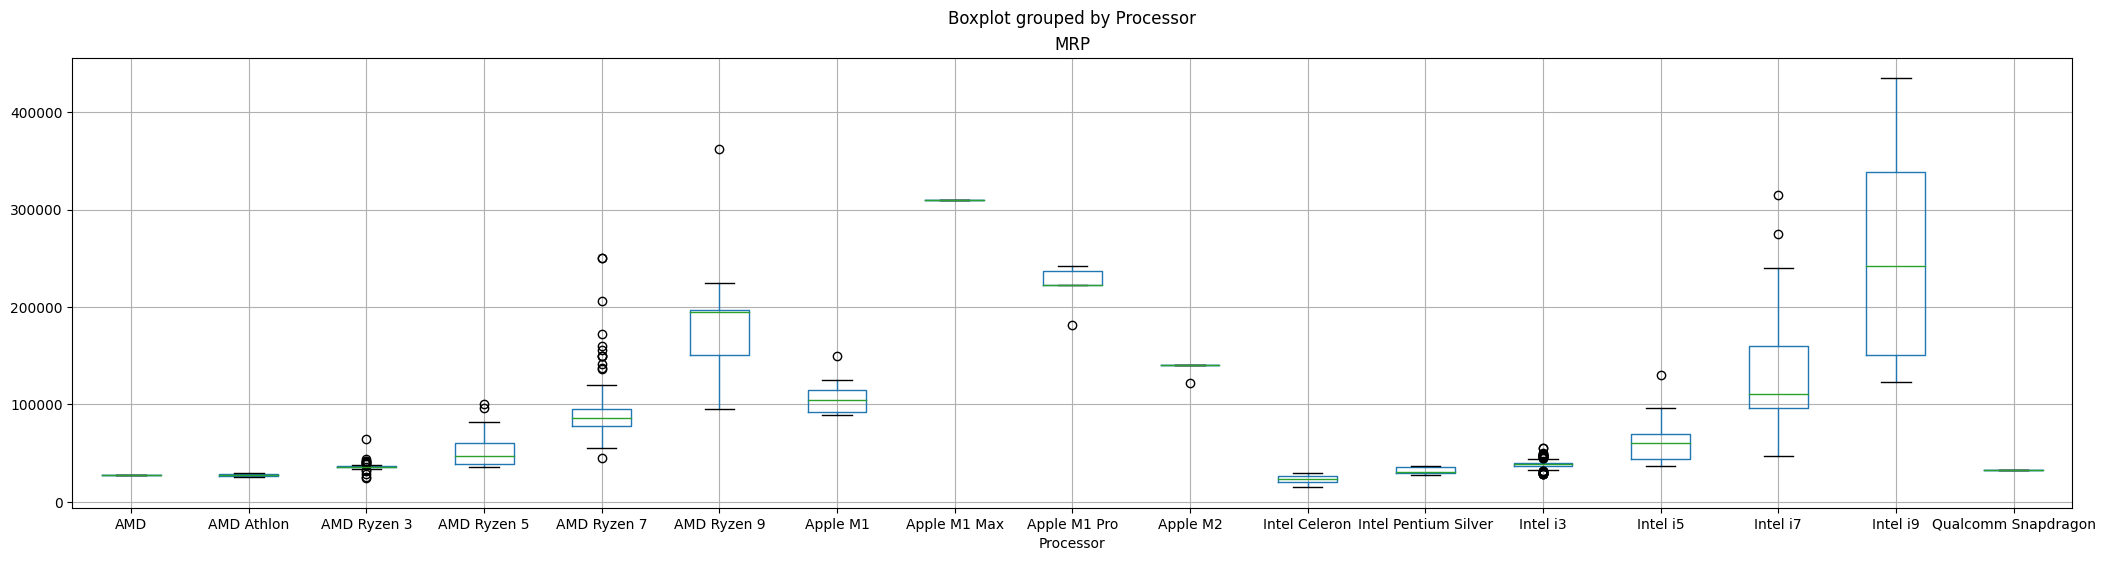

In [ ]:
df.boxplot(column='MRP', by='Processor', figsize=(25,6))

In [ ]:
df[df['Processor']=='AMD Ryzen 5']

,Product,Rating,MRP,Feature,Processor,Core
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
10,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,59990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
11,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,38705.0,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Quad Core
13,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.4,52990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
18,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5-5600H - ...,4.4,47990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
...,...,...,...,...,...,...
674,HP HP Pavilion Ryzen 5 Hexa Core AMD R5-4600H ...,4.4,68990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
681,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,38705.0,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Quad Core
684,Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600...,4.0,73990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core
693,DELL Vostro Ryzen 5 Hexa Core 5625U - (8 GB/51...,NaN,52414.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core


Core

In [ ]:
df['Feature'][345]

'Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty'

In [ ]:
df[df['Processor']=='Intel Celeron']

,Product,Rating,MRP,Feature,Processor
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,19490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
62,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,4.0,23990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
72,Infinix INBook X1 Neo Series Celeron Quad Core...,4.2,22990.0,Intel Celeron Quad Core Processor8 GB LPDDR4X ...,Intel Celeron
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,15990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
183,Infinix INBook X1 Neo Series Celeron Quad Core...,4.2,20990.0,Intel Celeron Quad Core Processor4 GB LPDDR4X ...,Intel Celeron
202,Lenovo IdeaPad 3 Celeron Dual Core 4th Gen - (...,4.0,25950.0,Intel Celeron Dual Core Processor (4th Gen)4 G...,Intel Celeron
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron
434,Lenovo IdeaPad 1 Celeron Dual Core 4th Gen - (...,3.9,26490.0,Intel Celeron Dual Core Processor (4th Gen)4 G...,Intel Celeron


CORE

In [ ]:
df['Core']=df.Feature.apply(lambda x: re.compile(r'\w+\s+Core').search(x))


In [ ]:
for i in range(len(df['Core'])):
  if df['Core'][i] == None:
    if 'Apple' in df['Processor'][i]:
      df['Core'][i] = 'M Core'
    elif 'Pentium' in df['Processor'][i]:
      df['Core'][i] = 'Intel Core'
    else:
      df['Core'][i] = 'Octa Core'
  else:
    df['Core'][i] = df['Core'][i].group()


<ipython-input-47-8d89ffe712d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = df['Core'][i].group()
<ipython-input-47-8d89ffe712d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'M Core'
<ipython-input-47-8d89ffe712d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'Octa Core'
<ipython-input-47-8d89ffe712d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
df['Core'].unique()

array(['Intel Core', 'Hexa Core', '2 Core', 'DriveIntel Core',
       'Quad Core', 'Octa Core', 'M Core', 'Dual Core', 'Evo Core',
       'availableIntel Core', 'OSIntel Core', '1Intel Core',
       'CenterIntel Core', 'PerformanceIntel Core', 'micIntel Core',
       'settingsIntel Core', 'TiIntel Core', 'KeypadIntel Core'],
      dtype=object)

In [ ]:
for i in range(len(df['Core'])):
  if "Intel" in df['Core'][i]:
    df['Core'][i] = 'Intel Core'

<ipython-input-49-5b8eb9eaf874>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'Intel Core'


In [ ]:
for i in range(len(df['Core'])):
  if df['Core'][i] == '2 Core':
      df['Core'][i] = 'Dual Core'

<ipython-input-50-0cf024df92f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'Dual Core'


<Axes: >

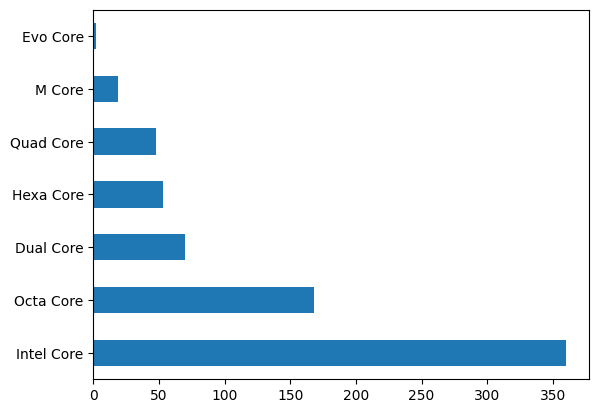

In [ ]:
df['Core'].value_counts().plot(kind='barh')

In [ ]:
df[df['Core']=='Intel Core']

,Product,Rating,MRP,Feature,Processor,Core
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Intel Core
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Intel Core
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Intel Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Intel Core
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Intel Core
...,...,...,...,...,...,...
708,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,3.9,44990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Intel Core
712,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2...,NaN,233990.0,Intel Core i7 Processor (10th Gen)16 GB LPDDR3...,Intel i7,Intel Core
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,76590.0,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel i5,Intel Core
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Intel Core


In [ ]:
df['Feature'][94]

'Processor: Intel PQC-N5030 (1.10 GHz up to 3.10 GHz)RAM & Storage: 8GB DDR4 & 256GB SSDDisplay: 15.6" HD AG Narrow BorderSoftware: Win 11 + Office H&S 20212x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneWiFi & BT: 802.11ac 1x1 WiFi and BluetoothIntel Pentium Silver Processor8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD39.62 cm (15.6 Inch) Display1 Year Onsite Warranty'

In [ ]:
df['Processor'][83]

'Qualcomm Snapdragon'

<Axes: title={'center': 'MRP'}, xlabel='Core'>

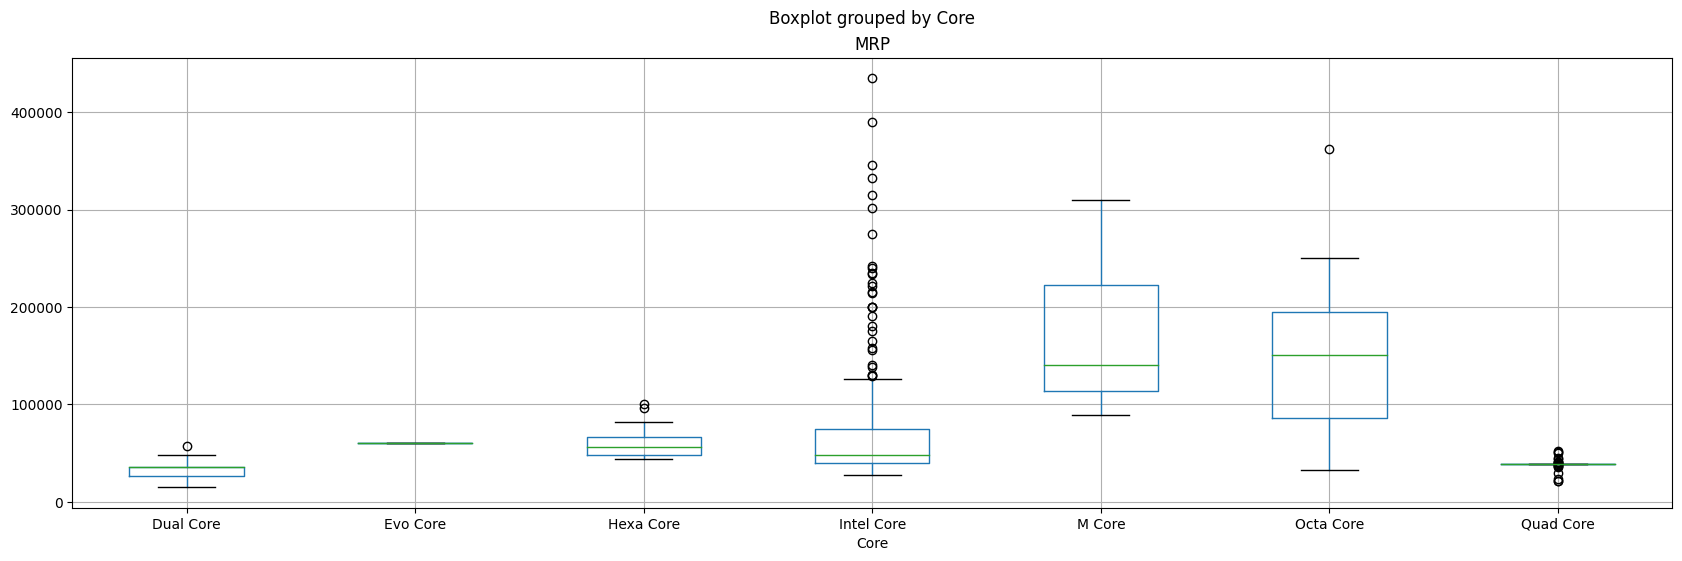

In [ ]:
df.boxplot(column='MRP', by='Core', figsize=(20,6))

In [ ]:
for i in range(len(df['Core'])):
  if df['Core'][i] == 'Intel Core':
    if df['MRP'][i]< 100000:
      df['Core'][i] = 'Hexa Core'
    elif df['MRP'][i]> 100000:
      df['Core'][i] = 'Octa Core'

<ipython-input-56-c1023b346342>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'Hexa Core'
<ipython-input-56-c1023b346342>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Core'][i] = 'Octa Core'


<Axes: title={'center': 'MRP'}, xlabel='Core'>

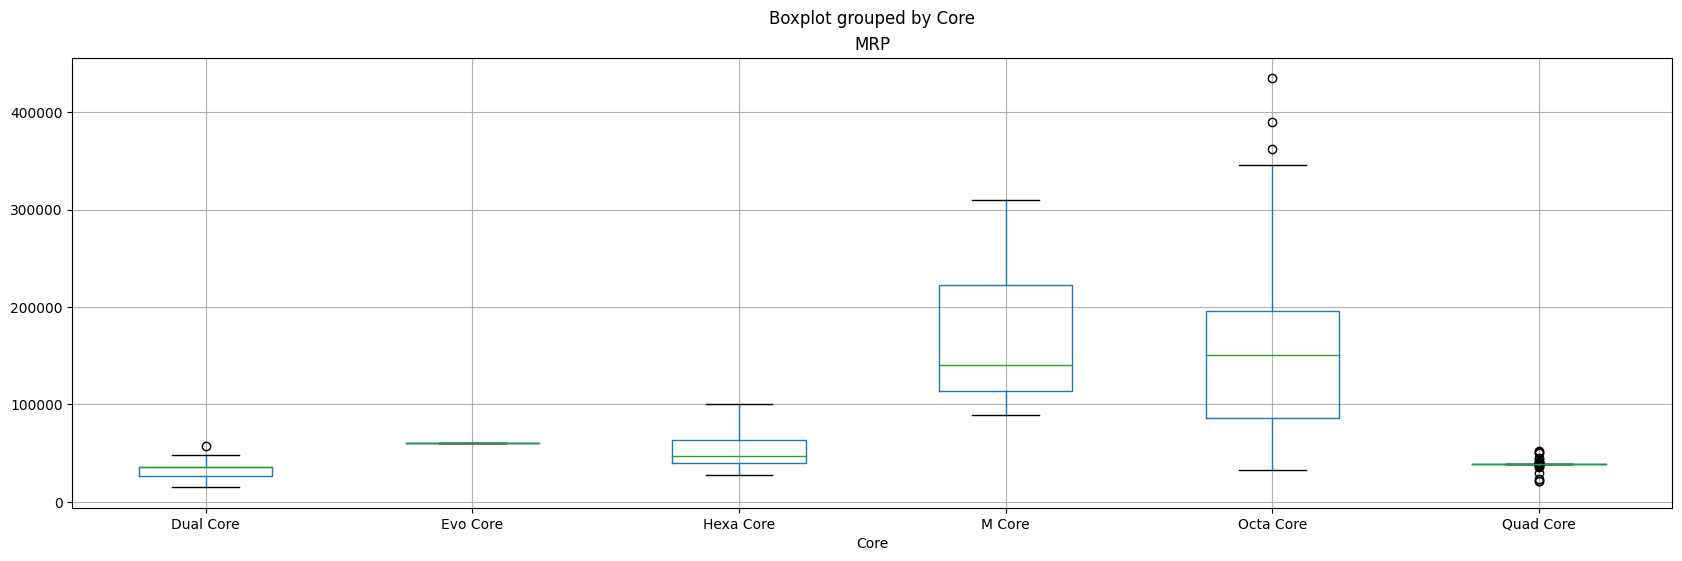

In [ ]:
df.boxplot(column='MRP', by='Core', figsize=(20,6))

In [ ]:
df['Feature'][534]

'Intel Core i7 Processor (12th Gen)16 GB DDR5 RAM64 bit Windows 11 Operating System1 TB SSD39.62 cm (15.6 Inch) DisplayAcer Care Center, Acer Product Registration, Planet9, PredatorSense1 Year International Travelers Warranty (ITW)'

In [ ]:
df['Core'][597]

'Octa Core'

In [ ]:
df['Core'] = df['Core'].str.replace(" Core","")

In [ ]:
df['Core'].unique()

array(['Hexa', 'Dual', 'Quad', 'Octa', 'M', 'Evo'], dtype=object)

In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,256,GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa,8,DDR4,512,GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa,8,DDR4,512,GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual,4,LPDDR4,64,GB,EMMC,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa,8,DDR4,512,GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa,16,DDR5,1,TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa,16,LPDDR5,512,GB,SSD,ASUS


RAM

In [ ]:
df['RAM']=df.Feature.apply(lambda x: re.compile(r'\d+\s+(?:GB|TB)\s+(?:LP)?DDR\d+(?:X)?\s+RAM').search(x))

In [ ]:
df['RAM']

0      <re.Match object; span=(34, 47), match='8 GB D...
1      <re.Match object; span=(34, 47), match='8 GB D...
2      <re.Match object; span=(34, 47), match='8 GB D...
3      <re.Match object; span=(31, 44), match='8 GB D...
4      <re.Match object; span=(34, 47), match='8 GB D...
                             ...                        
715    <re.Match object; span=(33, 48), match='4 GB L...
716    <re.Match object; span=(31, 44), match='8 GB D...
717    <re.Match object; span=(31, 45), match='16 GB ...
718    <re.Match object; span=(34, 50), match='16 GB ...
719    <re.Match object; span=(34, 47), match='8 GB D...
Name: RAM, Length: 720, dtype: object

In [ ]:
df['Feature'][83]

'Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty'

In [ ]:
df[df['RAM'].isnull()]

,Product,Rating,MRP,Feature,Processor,Core,RAM
64,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,4.7,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,None
79,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,181990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,None
85,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,5.0,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,None
153,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,4.8,241990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,None
162,APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SS...,4.3,309490.0,Apple M1 Max Processor32 GB Unified Memory RAM...,Apple M1 Max,M Core,None
168,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,4.8,222990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,None
209,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,222990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,None
233,APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...,4.6,121990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,None
282,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,4.7,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,None
297,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,4.3,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,None


In [ ]:
for i in range (len(df['RAM'])):
  if df.RAM[i] == None:
    print(i)

64
79
85
153
162
168
209
233
282
297
305
325


In [ ]:
df['Feature'][85]

'Apple M2 Processor8 GB Unified Memory RAMMac OS Operating System512 GB SSD34.54 cm (13.6 Inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty'

In [ ]:
for i in range (len(df['RAM'])):
  if df.RAM[i] == None:
    df.RAM[i] = re.compile(r'\d\s+GB+\s+\w+\s+\w+\s+RAM').search(df['Feature'][i])

<ipython-input-69-f27cbe65309d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.RAM[i] = re.compile(r'\d\s+GB+\s+\w+\s+\w+\s+RAM').search(df['Feature'][i])


In [ ]:
for i in range (len(df['RAM'])):
  if df.RAM[i] == None:
    print(i)
  

In [ ]:
df['RAM']

0      <re.Match object; span=(34, 47), match='8 GB D...
1      <re.Match object; span=(34, 47), match='8 GB D...
2      <re.Match object; span=(34, 47), match='8 GB D...
3      <re.Match object; span=(31, 44), match='8 GB D...
4      <re.Match object; span=(34, 47), match='8 GB D...
                             ...                        
715    <re.Match object; span=(33, 48), match='4 GB L...
716    <re.Match object; span=(31, 44), match='8 GB D...
717    <re.Match object; span=(31, 45), match='16 GB ...
718    <re.Match object; span=(34, 50), match='16 GB ...
719    <re.Match object; span=(34, 47), match='8 GB D...
Name: RAM, Length: 720, dtype: object

In [ ]:
ram = []
for i in df['RAM']:
  ram.append(i.group())

In [ ]:
df['RAM'] = ram

In [ ]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '6 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '2 GB Unified Memory RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [ ]:
ram_type = df.RAM.apply(lambda x: re.compile(r'\w+\s+RAM').search(x).group())


In [ ]:
ram_type

0        DDR4 RAM
1        DDR4 RAM
2        DDR4 RAM
3        DDR4 RAM
4        DDR4 RAM
          ...    
715    LPDDR4 RAM
716      DDR4 RAM
717      DDR5 RAM
718    LPDDR5 RAM
719      DDR4 RAM
Name: RAM, Length: 720, dtype: object

In [ ]:
df['RAM_type'] = ram_type

In [ ]:
df['RAM_type'].unique()

array(['DDR4 RAM', 'DDR5 RAM', 'LPDDR4 RAM', 'Memory RAM', 'LPDDR4X RAM',
       'LPDDR5 RAM', 'LPDDR3 RAM'], dtype=object)

In [ ]:
df[df['RAM_type']=='Memory RAM']

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type
64,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,4.7,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,8 GB Unified Memory RAM,Memory RAM
79,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,181990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,6 GB Unified Memory RAM,Memory RAM
85,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,5.0,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,8 GB Unified Memory RAM,Memory RAM
153,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,4.8,241990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,6 GB Unified Memory RAM,Memory RAM
162,APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SS...,4.3,309490.0,Apple M1 Max Processor32 GB Unified Memory RAM...,Apple M1 Max,M Core,2 GB Unified Memory RAM,Memory RAM
168,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,4.8,222990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,6 GB Unified Memory RAM,Memory RAM
209,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,222990.0,Apple M1 Pro Processor16 GB Unified Memory RAM...,Apple M1 Pro,M Core,6 GB Unified Memory RAM,Memory RAM
233,APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...,4.6,121990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,8 GB Unified Memory RAM,Memory RAM
282,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,4.7,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,8 GB Unified Memory RAM,Memory RAM
297,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,4.3,139990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,Apple M2,M Core,8 GB Unified Memory RAM,Memory RAM


In [ ]:
df['Feature'][325]

'Apple M1 Pro Processor16 GB Unified Memory RAMMac OS Operating System512 GB SSD41.15 cm (16.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty'

In [ ]:
for i in range(len(ram_type)):
  if 'Memory RAM' in ram_type[i]:
    ram_type[i] = re.compile(r'\w+\s+\w+\s+RAM').search(df['RAM'][i]).group()
  

In [ ]:
df['RAM_type'] = ram_type

In [ ]:
df['RAM_type'].unique()

array(['DDR4 RAM', 'DDR5 RAM', 'LPDDR4 RAM', 'Unified Memory RAM',
       'LPDDR4X RAM', 'LPDDR5 RAM', 'LPDDR3 RAM'], dtype=object)

In [ ]:
df['RAM_type'] = df['RAM_type'].str.replace(" RAM","")

In [ ]:
df['RAM_type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified Memory', 'LPDDR4X', 'LPDDR5',
       'LPDDR3'], dtype=object)

In [ ]:
df['RAM'] = df.RAM.apply(lambda x: re.compile(r'\d+').search(x).group())

In [ ]:
df['RAM'].unique()

array(['8', '16', '4', '6', '2', '32'], dtype=object)

In [ ]:
df[df['RAM_type'].isnull()]

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type


In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,256,GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa,8,DDR4,512,GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa,8,DDR4,512,GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual,4,LPDDR4,64,GB,EMMC,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa,8,DDR4,512,GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa,16,DDR5,1,TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa,16,LPDDR5,512,GB,SSD,ASUS


HDD / SSD

In [ ]:
df['Feature'][50]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [ ]:
df['Storage']=df.Product.apply(lambda x: re.compile(r'(\d+\s+\w+\s+(HDD|SSD))').search(x))

In [ ]:
for i in range(len(df['Storage'])):
  if df['Storage'][i] == None:
    df['Storage'][i] = re.compile(r'\d+\s+\w+\s+\w+\s+Storage').search(df['Product'][i])

<ipython-input-106-c906077293fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage'][i] = re.compile(r'\d+\s+\w+\s+\w+\s+Storage').search(df['Product'][i])


In [ ]:
df[df['Storage'].isnull()]

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage


In [ ]:
Storage = []
for i in df['Storage']:
  Storage.append(i.group())
df['Storage'] = Storage

In [ ]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD', '1 TB SSD', '256 GB HDD',
       '128 GB EMMC Storage', '64 GB EMMC Storage', '128 GB SSD',
       '32 GB EMMC Storage', '2 TB SSD'], dtype=object)

In [ ]:
df['Storage'] = df['Storage'].str.replace(" Storage","")

In [ ]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD', '1 TB SSD', '256 GB HDD',
       '128 GB EMMC', '64 GB EMMC', '128 GB SSD', '32 GB EMMC',
       '2 TB SSD'], dtype=object)

In [ ]:
df['Storagebytes'] = df.Storage.apply(lambda x: re.compile(r'(GB|TB)').search(x).group())

In [ ]:
df['Storagebytes'].unique()

array(['GB', 'TB'], dtype=object)

In [ ]:
df['Storagetype'] = df.Storage.apply(lambda x: re.compile(r'(SSD|HDD|EMMC)').search(x).group())

In [ ]:
df['Storage'] = df.Storage.apply(lambda x: re.compile(r'\d+').search(x).group())

In [ ]:
df['Storage']

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719      1
Name: Storage, Length: 720, dtype: object

In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,256,GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa,8,DDR4,512,GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa,8,DDR4,512,GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual,4,LPDDR4,64,GB,EMMC,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa,8,DDR4,512,GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa,16,DDR5,1,TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa,16,LPDDR5,512,GB,SSD,ASUS


Brand

In [ ]:
df['Brand'] = df.Product.apply(lambda x: re.compile(r'\w+').search(x).group())

In [ ]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa Core,8,DDR4,256,GB,SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa Core,8,DDR4,512,GB,SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa Core,8,DDR4,512,GB,SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa Core,8,DDR4,512,GB,SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa Core,8,DDR4,512,GB,SSD,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual Core,4,LPDDR4,64,GB,EMMC,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa Core,8,DDR4,512,GB,SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa Core,16,DDR5,1,TB,SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa Core,16,LPDDR5,512,GB,SSD,ASUS


OS

In [ ]:
df['OS'] = df.Feature.apply(lambda x: re.compile(r'(Windows|Chrome|Mac|DOS)+\s+\w+').search(x).group())

In [ ]:
df["OS"].unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS Operating',
       'Chrome Operating'], dtype=object)

In [ ]:
df['OS'] = df['OS'].str.replace(" Operating","")

In [ ]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS', 'Chrome'],
      dtype=object)

In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,256,GB,SSD,Lenovo,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,Lenovo,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,ASUS,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa,8,DDR4,512,GB,SSD,HP,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa,8,DDR4,512,GB,SSD,ASUS,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual,4,LPDDR4,64,GB,EMMC,ASUS,Chrome
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa,8,DDR4,512,GB,SSD,Lenovo,Windows 11
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa,16,DDR5,1,TB,SSD,ASUS,Windows 11
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa,16,LPDDR5,512,GB,SSD,ASUS,Windows 11


Screen Size

In [ ]:
df['Screen_Size']=df.Feature.apply(lambda x: re.compile(r'(\(|:|:\s)(\d+(?:\.\d+)?)\s*(inch|Inch|in|\"|-inch|")').search(x).group())

In [ ]:
df['Screen_Size'].unique()

array(['(14 inch', '(15.6 inch', ': 15.6"', '(15.6 Inch', '(17.3 Inch',
       '(13.3 inch', '(14 Inch', '(13.3 Inch', '(14.2 inch', '(13.6 Inch',
       '(16 inch', ': 14.0"', '(16.1 inch', '(16.2 inch', '(17.3 inch',
       '(14.1 inch', '(16 Inch', '(13.4 Inch', '(11.6 inch', ':14.0-inch',
       '(15 inch', '(13 inch', '(14.96 Inch', '(13.5 inch', '(16.1 Inch',
       '(11.6 Inch', '(16.6 inch'], dtype=object)

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace("(","")

<ipython-input-156-0b307401b07c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Screen_Size'] = df["Screen_Size"].str.replace("(","")


In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace(":","")

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace("-","")

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace("inch","")

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace("Inch","")

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace(" ","")

In [ ]:
df['Screen_Size'] = df["Screen_Size"].str.replace('"',"")

In [ ]:
df['Screen_Size'] = df['Screen_Size'].astype('float')

In [ ]:
df['Screen_Size'].unique()

array([14.  , 15.6 , 17.3 , 13.3 , 14.2 , 13.6 , 16.  , 16.1 , 16.2 ,
       14.1 , 13.4 , 11.6 , 15.  , 13.  , 14.96, 13.5 , 16.6 ])

In [ ]:
df

,Product,Rating,MRP,Feature,Processor,Core,RAM,RAM_type,Storage,Storagebytes,Storagetype,Brand,OS,Screen_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,256,GB,SSD,Lenovo,Windows 11,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,Lenovo,Windows 11,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel i3,Hexa,8,DDR4,512,GB,SSD,ASUS,Windows 11,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5,Hexa,8,DDR4,512,GB,SSD,HP,Windows 10,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel i5,Hexa,8,DDR4,512,GB,SSD,ASUS,Windows 11,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron,Dual,4,LPDDR4,64,GB,EMMC,ASUS,Chrome,11.6
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7,Octa,8,DDR4,512,GB,SSD,Lenovo,Windows 11,15.6
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9,Octa,16,DDR5,1,TB,SSD,ASUS,Windows 11,15.6
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel i7,Octa,16,LPDDR5,512,GB,SSD,ASUS,Windows 11,14.0


In [ ]:
df.to_csv('file1.csv')

In [ ]:
df[(df['MRP']<20000) & (df['MRP']>10000)]

,Product,Rating,MRP,Feature,Processor,RAM,HDD/SSD,Brand,OS,Screen_Size
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,19490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB HDD,Lenovo,DOS Operating,15.6
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,Lenovo,Chrome Operating,14.0
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,Lenovo,Chrome Operating,14.0
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,15990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,128 GB SSD,Ultimus,DOS Operating,14.1
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,32 GB EMMC Storage,ASUS,Chrome Operating,11.6
535,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,19990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,128 GB SSD,Ultimus,Windows 11,14.1
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,ASUS,Windows 11,11.6


In [ ]:
df[df['MRP']<20000]

,Product,Rating,MRP,Feature,Processor,RAM,HDD/SSD,Brand,OS,Screen_Size
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,19490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB HDD,Lenovo,DOS Operating,15.6
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,Lenovo,Chrome Operating,14.0
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,Lenovo,Chrome Operating,14.0
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,15990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,128 GB SSD,Ultimus,DOS Operating,14.1
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,32 GB EMMC Storage,ASUS,Chrome Operating,11.6
535,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,NaN,19990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,128 GB SSD,Ultimus,Windows 11,14.1
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990.0,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 GB EMMC Storage,ASUS,Windows 11,11.6


In [ ]:
df[df['MRP']>180000]

,Product,Rating,MRP,Feature,Processor,RAM,HDD/SSD,Brand,OS,Screen_Size
15,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
41,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
56,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
70,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
...,...,...,...,...,...,...,...,...,...,...
688,ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/W...,4.1,214790.0,NVIDIA GeForce RTX 206015.6 inch Full HD LED B...,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB SSD,ALIENWARE,Windows 10,15.6
689,ALIENWARE Core i7 10th Gen - (16 GB/512 GB SSD...,4.9,199990.0,NVIDIA GeForce GTX 1660 Ti15.6 inch Full HD LE...,Intel Core i7 Processor,16 GB DDR4 RAM,512 GB SSD,ALIENWARE,Windows 10,15.6
701,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11,15.6
712,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2...,NaN,233990.0,Intel Core i7 Processor (10th Gen)16 GB LPDDR3...,Intel Core i7 Processor,16 GB LPDDR3 RAM,2 TB SSD,ASUS,Windows 10,14.0


<Axes: >

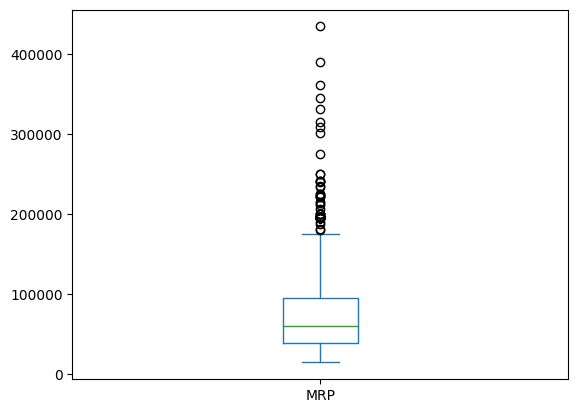

In [ ]:
df['MRP'].plot(kind='box')

<Axes: ylabel='Density'>

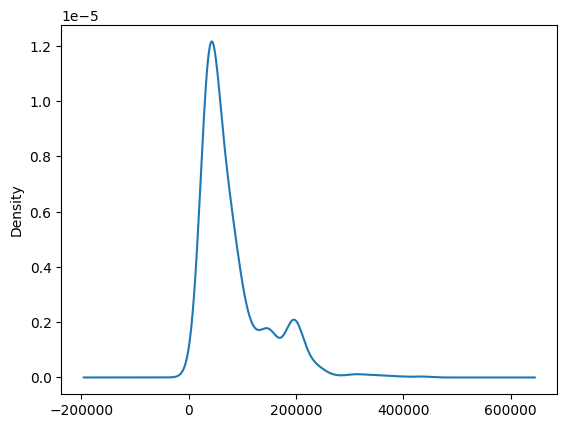

In [ ]:
df['MRP'].plot(kind='kde')

<Axes: ylabel='Frequency'>

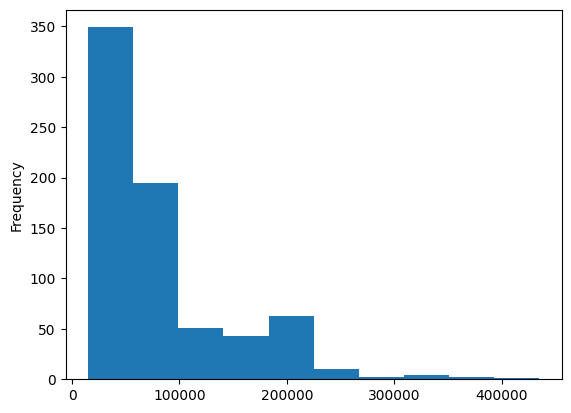

In [ ]:
df['MRP'].plot(kind='hist')

As you can see from the above kde and histogram, we can say that maximum laptops are under 100000

<Axes: >

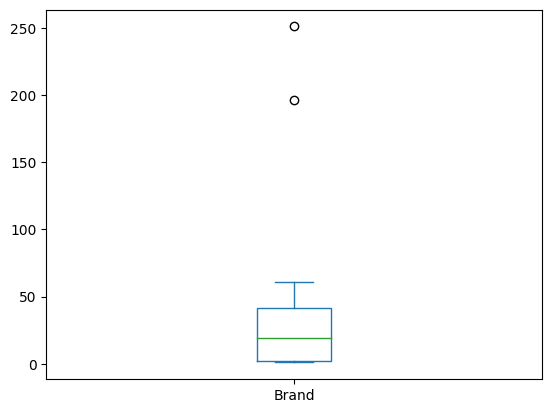

In [ ]:
df['Brand'].value_counts().plot(kind='box')

In [ ]:
print(df["MRP"].quantile(1))

434830.0


In [ ]:
print(df["MRP"].quantile(0.25))
print(df["MRP"].quantile(0.75))

38996.75
95240.0


In [ ]:
df[df['MRP'] == ]

,Product,Rating,MRP,Feature,Processor,RAM,HDD/SSD,Brand,OS,Screen_Size
625,DELL Allienware Core i9 11th Gen - (32 GB/1 TB...,NaN,434830.0,Intel Core i9 Processor (11th Gen)32 GB DDR4 R...,Intel Core i9 Processor,32 GB DDR4 RAM,1 TB SSD,DELL,Windows 11,17.3


In [ ]:
df['Feature'][625]

'Intel Core i9 Processor (11th Gen)32 GB DDR4 RAM64 bit Windows 11 Operating System1 TB SSD43.94 cm (17.3 Inch) Display1 Year Onsite Premium Support Plus (Includes ADP)'

In [ ]:
df.to_csv('file1.csv')

<Axes: >

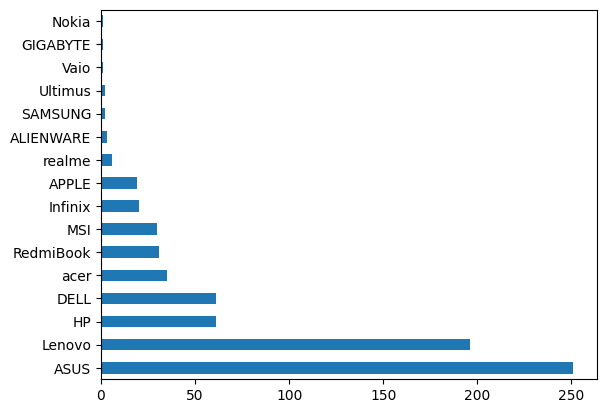

In [ ]:
df['Brand'].value_counts().plot(kind='barh')

<Axes: title={'center': 'MRP'}, xlabel='Brand'>

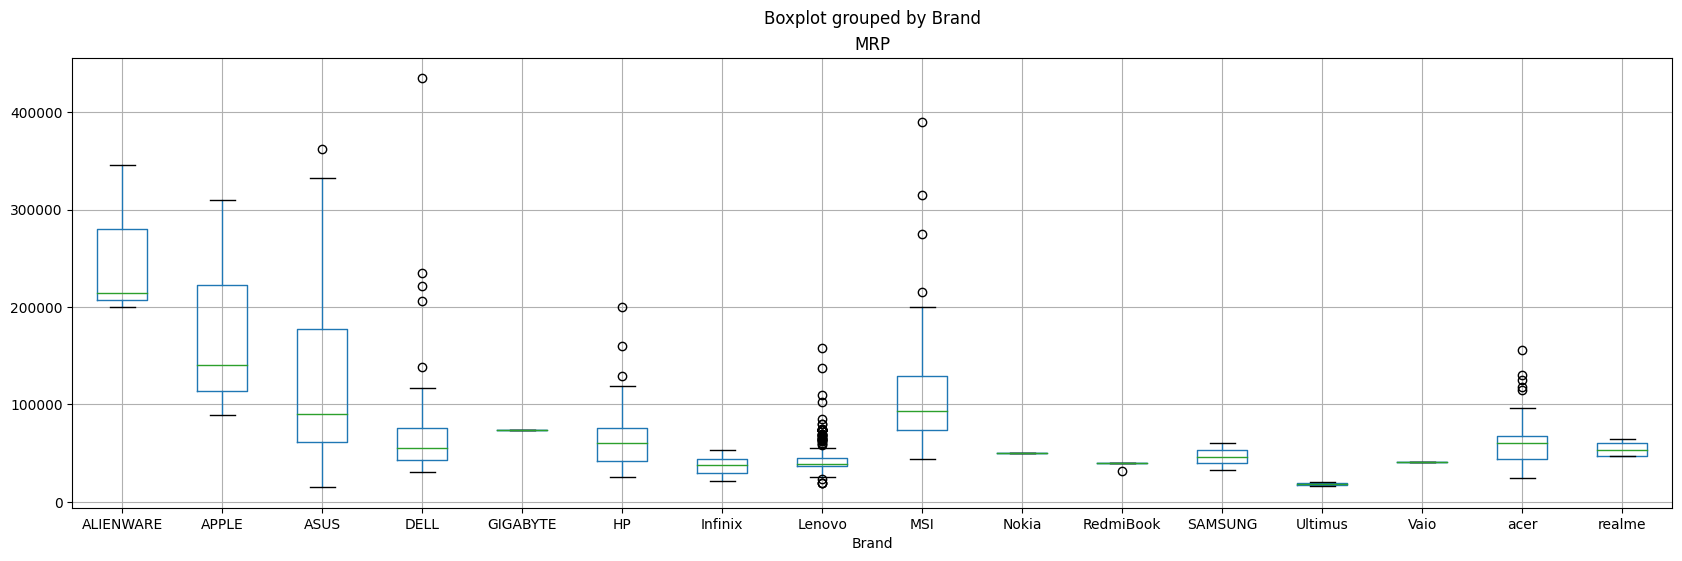

In [ ]:
df.boxplot(column='MRP', by='Brand', figsize=(20,6))

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-144-ce8c392d4dba>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


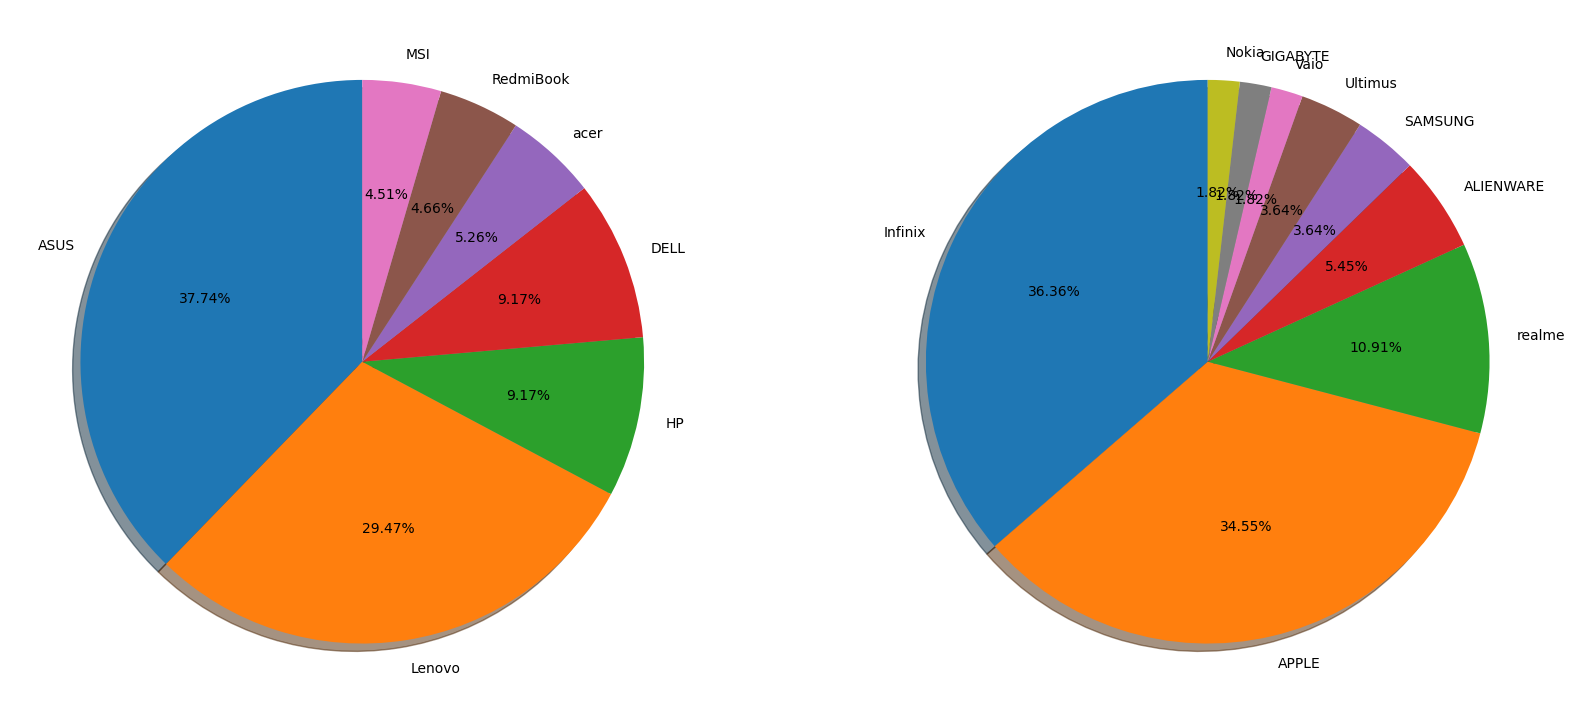

In [ ]:
pie1= dict(df.Brand.value_counts())
brand_list=list(pie1.keys())
count_list=list(pie1.values())
plt.figure(figsize=(20,20))
plt.title('Laptop Brands with highest Variants')
plt.subplot(1,2,1)
plt.pie(count_list[:7],labels=brand_list[:7],autopct='%1.2f%%',shadow=True,startangle=90)
plt.subplot(1,2,2)
plt.pie(count_list[7:18],labels=brand_list[7:18],autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

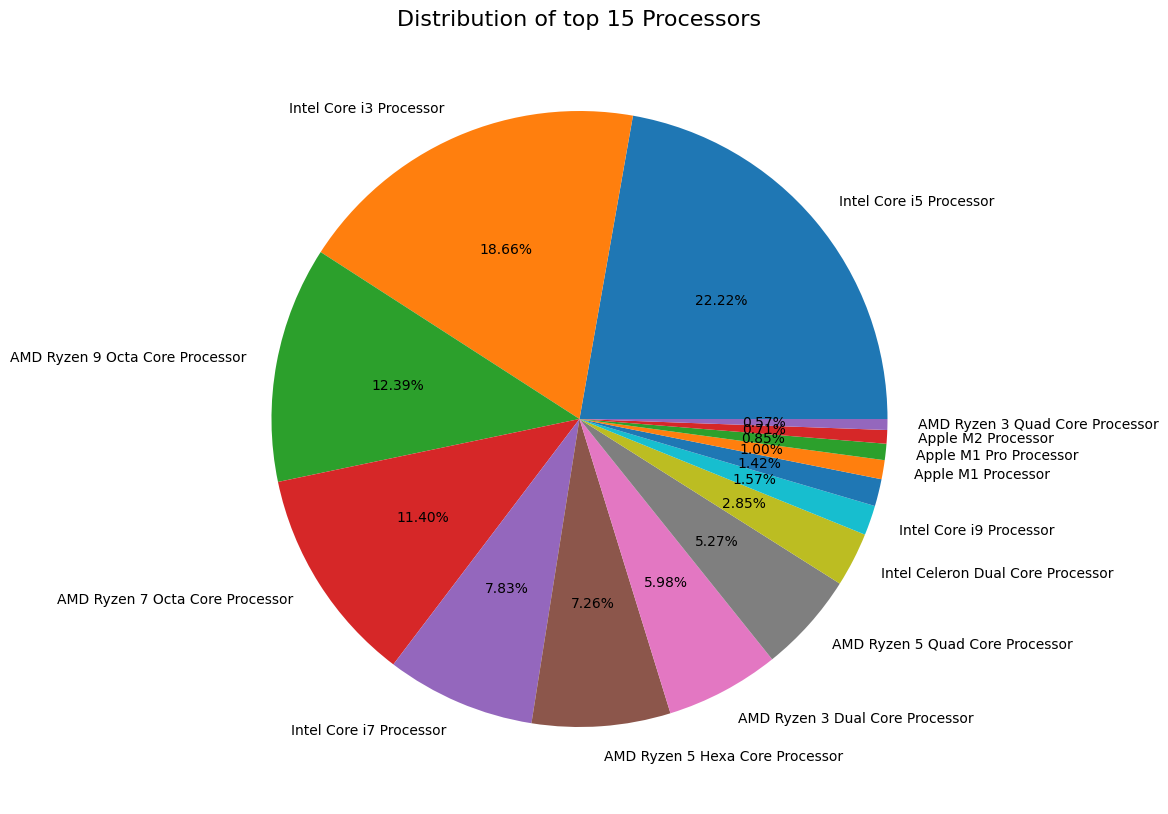

In [ ]:
pcr=dict(df.Processor.value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,10))
pcr_x,pcr_y=list(pcr.keys()),list(pcr.values())
plt.pie(pcr_y[:15],labels=pcr_x[:15],autopct='%1.2f%%',startangle=0)
plt.title('Distribution of top 15 Processors',fontsize=16)
plt.show()

In [ ]:
df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', '', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'Intel Pentium Silver Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [ ]:
df['Processor'] = df['Processor'].str.replace('Core','')

In [ ]:
df['Processor'] = df['Processor'].str.replace(' ','')

In [ ]:
df['Processor'].unique()

array(['Inteli3', 'AMDRyzen5Hexa', 'Inteli5', 'AMDRyzen7Quad',
       'AMDRyzen5Quad', 'AMDRyzen9Octa', 'AMDRyzen7Octa', 'AppleM1',
       'IntelCeleronDual', 'AMDRyzen3Dual', 'AMDAthlonDual', 'IntelEvoi5',
       'AMDRyzen3Quad', 'AppleM2', 'AMDRyzenR5', 'IntelCeleronQuad',
       'Inteli7', 'AppleM1Pro', 'QualcommSnapdragon7cGen2', 'IntelPQC',
       'AMDRyzen3', 'AppleM1Max', 'Inteli9', 'IntelPentiumSilver',
       'AMDRyzen5', 'AMDRyzen5Dual', 'IntelPentiumQuad', 'AMDDual',
       'AMDRyzen3Hexa'], dtype=object)

<Axes: xlabel='Brand', ylabel='MRP'>

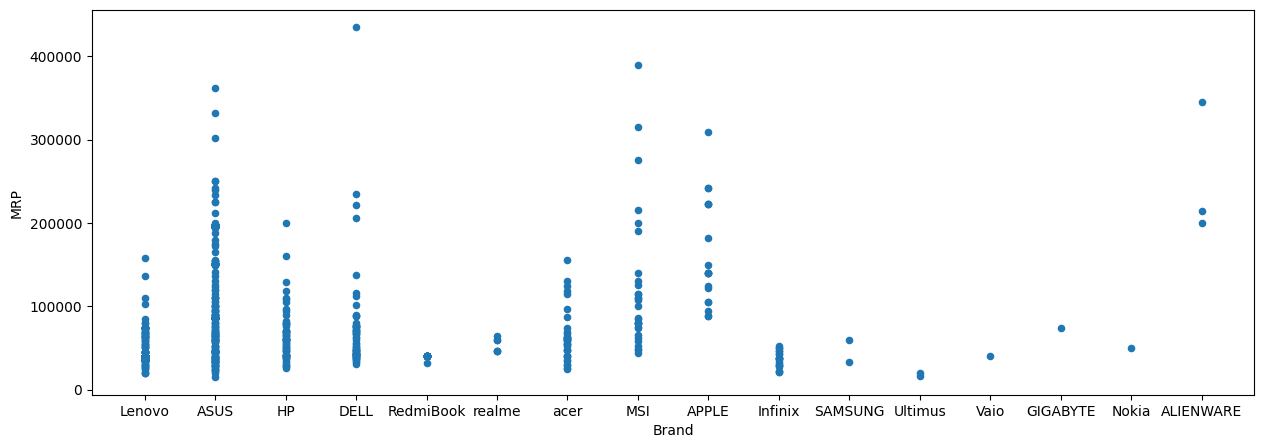

In [ ]:
df.plot(kind="scatter", x="Brand", y="MRP",figsize=(15,5))

<Axes: xlabel='Brand', ylabel='RAM'>

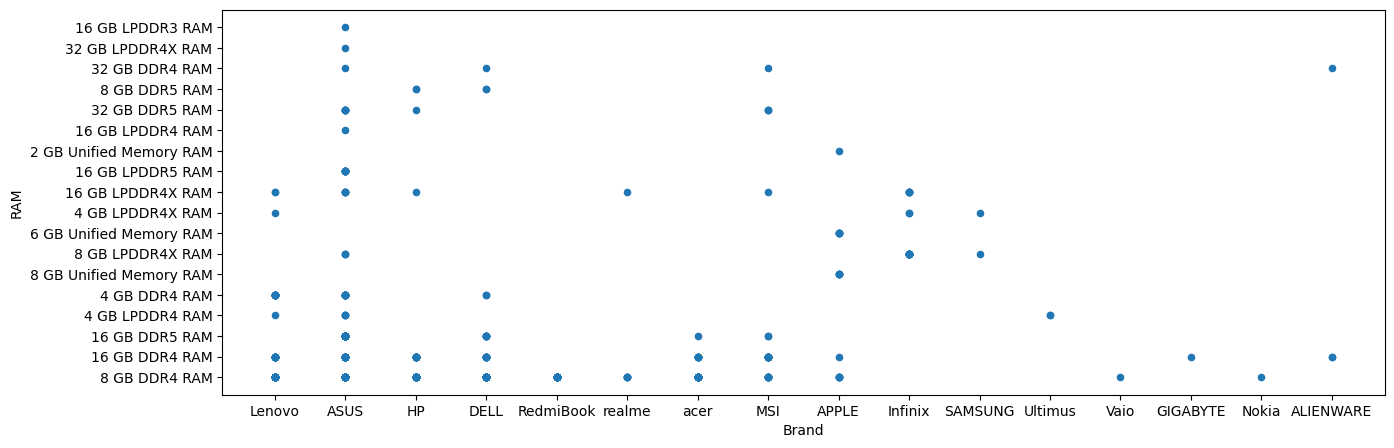

In [ ]:
df.plot(kind="scatter", x="Brand", y="RAM",figsize=(15,5))

<Axes: xlabel='Brand', ylabel='Processor'>

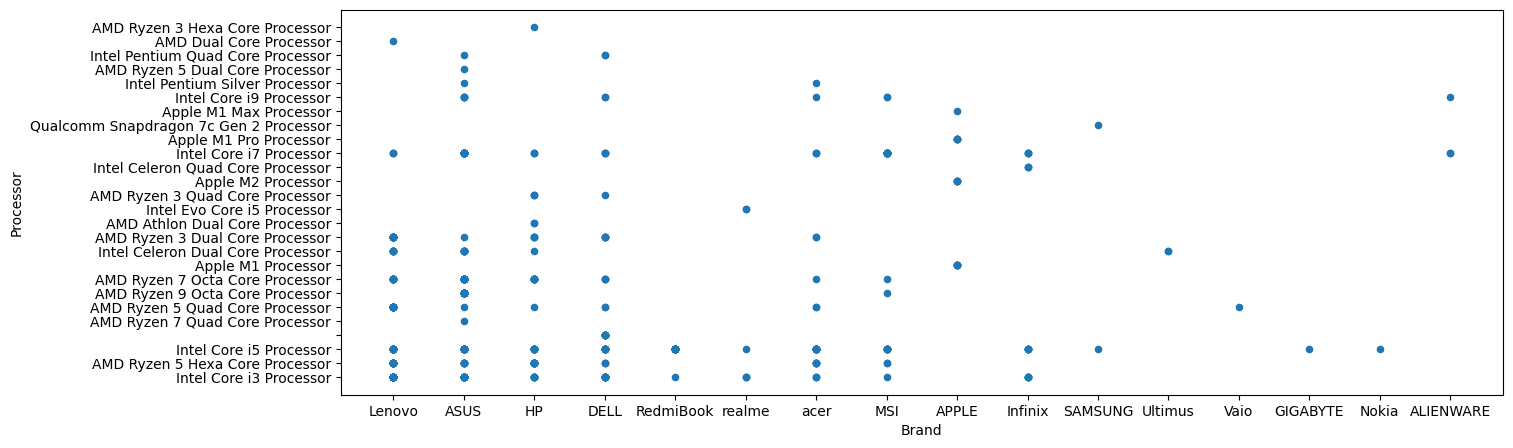

In [ ]:
df.plot(kind="scatter", x="Brand", y="Processor",figsize=(15,5))

In [ ]:
df1 = df.copy()

In [ ]:
X = df1.drop('', axis=1) 
y = df['MRP'] # target variable


In [ ]:
df1 = df1.drop('Product',axis=1)

In [ ]:
df1 = df1.drop('Feature',axis=1)

In [ ]:
df1

,Rating,MRP,Processor,RAM,HDD/SSD,Brand,OS
0,4.2,36990.0,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,Lenovo,Windows 11
1,4.2,39990.0,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Lenovo,Windows 11
2,4.3,32990.0,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,ASUS,Windows 11
3,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,HP,Windows 10
4,4.4,49990.0,Intel Core i5 Processor,8 GB DDR4 RAM,512 GB SSD,ASUS,Windows 11
...,...,...,...,...,...,...,...
715,4.0,23490.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,64 GB EMMC Storage,ASUS,Chrome Operating
716,4.5,73490.0,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD,Lenovo,Windows 11
717,NaN,194990.0,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,ASUS,Windows 11
718,3.0,125990.0,Intel Core i7 Processor,16 GB LPDDR5 RAM,512 GB SSD,ASUS,Windows 11


In [ ]:
X = df1.drop('MRP', axis=1) # features
y = df1['MRP'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ValueError: ignored

In [ ]:
df.describe()

,Rating,MRP,Screen_Size
count,581.000000,720.000000,720.000000
mean,4.321170,81605.837500,15.183000
std,0.282872,61552.955102,0.891272
min,3.000000,14990.000000,11.600000
25%,4.200000,38996.750000,14.175000
50%,4.300000,59990.000000,15.600000
75%,4.500000,95240.000000,15.600000
max,5.000000,434830.000000,17.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      720 non-null    object 
 1   Rating       581 non-null    float64
 2   MRP          720 non-null    float64
 3   Feature      720 non-null    object 
 4   Processor    720 non-null    object 
 5   RAM          720 non-null    object 
 6   HDD/SSD      720 non-null    object 
 7   Brand        720 non-null    object 
 8   OS           720 non-null    object 
 9   Screen_Size  720 non-null    float64
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


In [ ]:
df['HDD/SSD']

0              256 GB SSD
1              512 GB SSD
2              512 GB SSD
3              512 GB SSD
4              512 GB SSD
              ...        
715    64 GB EMMC Storage
716            512 GB SSD
717              1 TB SSD
718            512 GB SSD
719              1 TB HDD
Name: HDD/SSD, Length: 720, dtype: object

<Axes: >

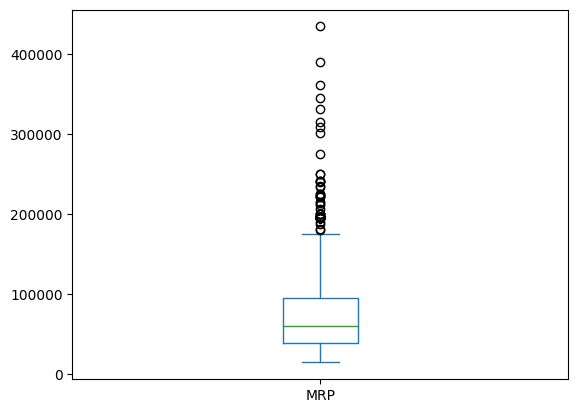

In [ ]:
df['MRP'].plot(kind='box')

In [ ]:
df['MRP'].mean()

81605.8375

In [ ]:
df['MRP'].std()

61552.95510244988

In [ ]:
df['MRP'].min()

14990.0

In [ ]:
df['MRP'].max()

434830.0

<Axes: ylabel='Density'>

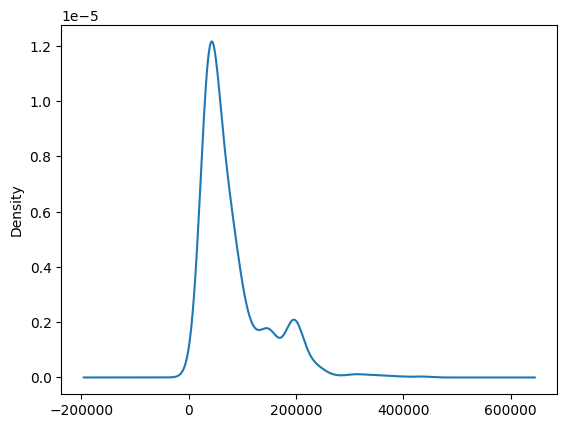

In [ ]:
df['MRP'].plot(kind='kde')

<Axes: ylabel='Frequency'>

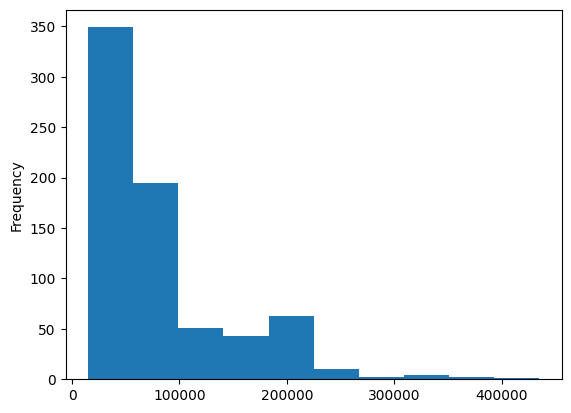

In [ ]:
df['MRP'].plot(kind='hist')

<Axes: >

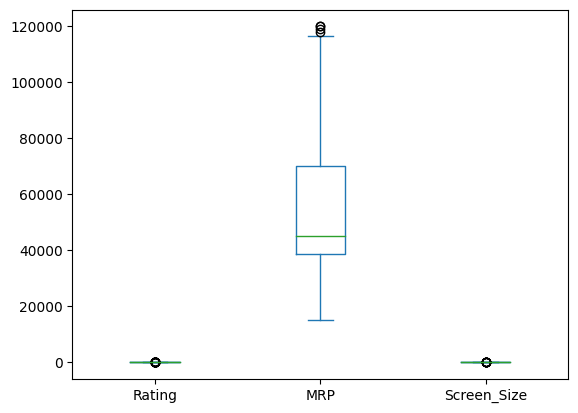

In [ ]:
df[df['MRP']<120000].plot(kind='box')